In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC

from helpers import visualize_data, collect_results

In [2]:
pd.options.display.max_rows = None

In [3]:
# change to True to run the experiments with the sex labels.
run_experiment_with_sex_labels = False

In [4]:
def select_videos(data_frame):
    """Selects which videos to use. 
    
    The list of videos is obtained from "Deception Detection in Videos" paper.
    """
    with open('data/video_list.txt') as f:
        used_videos = f.readlines()
        used_videos = [x.strip() for x in used_videos]
        data_frame = data_frame.query("id in @used_videos")
    return data_frame

# Read IDT features

In [ ]:
# features from the popular DARE paper
df_idt = pd.read_csv('real-life-data/mbh_features_of_dare.csv', index_col=0)

display(df_idt)

In [6]:
# prune 15 videos
df_idt = select_videos(df_idt)

In [7]:
# take features (already normalized).
x = df_idt.drop(['id'], axis=1).to_numpy()
x.shape

(104, 49152)

# Read lie/truth labels, sex labels and subjects

In [8]:
# read manually annotated (ground truth) microexpressions
df_gt = pd.read_csv('real-life-data/All_Gestures_Deceptive and Truthful.csv')
display(df_gt)

,id,OtherGestures,Smile,Laugh,Scowl,otherEyebrowMovement,Frown,Raise,OtherEyeMovements,Close-R,...,singleHand,bothHands,otherHandM,complexHandM,sidewaysHand,downHands,upHands,class,subject,sex
0,trial_lie_001.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,1,F
1,trial_lie_002.mp4,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,deceptive,1,F
2,trial_lie_003.mp4,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,deceptive,1,F
3,trial_lie_004.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,1,F
4,trial_lie_005.mp4,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,deceptive,1,F
5,trial_lie_006.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,1,F
6,trial_lie_007.mp4,1,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,deceptive,2,F
7,trial_lie_008.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,2,F
8,trial_lie_009.mp4,1,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,deceptive,2,F
9,trial_lie_010.mp4,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,deceptive,2,F


In [9]:
# prune 15 videos
df_gt = select_videos(df_gt)

In [10]:
# take lie labels
y = df_gt['class'].eq('deceptive').mul(1).to_numpy()

# take sex labels
y_sex = df_gt['sex'].eq('F').mul(1).to_numpy()

In [11]:
# number of truths/lies
print('Lie:', len(y[y == 1]))
print('Truth:', len(y[y==0]), end='\n\n')

# number of males/females
print('Females:', len(y_sex[y_sex==1]))
print('Males:', len(y_sex[y_sex==0]))

Lie: 54
Truth: 50

Females: 66
Males: 38


In [12]:
# take subjects
subjects = df_gt['subject'].to_numpy()

# Visualize

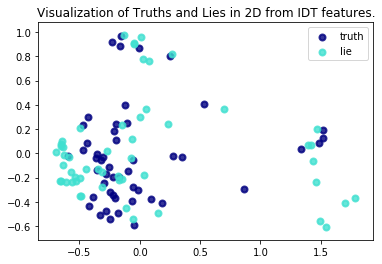

In [13]:
visualize_data(x, y, 'IDT')

# Perform experiments

In [ ]:
# perform hyperparameter search for IDT
idt_hyperparameter_map = {}
for C in [1e-4, 1e-3, 1e-2, 0.1, 0.5, 2, 10, 100]: # note that we tried more values. 
    clf = SVC(C=C, kernel='linear', probability=True)
    collect_results(x, y, y_sex, subjects, run_experiment_with_sex_labels, C, 
                    clf, idt_hyperparameter_map, use_predict=(not run_experiment_with_sex_labels), iterations=25)   